# Linear Models for Classification: Support Vector Machine

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge.

Last update 2/22/2022

**The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

## A Better Way

Recall that the Perceptron found a seperating hyperplane if one existed.  Also recall the date it was conceive - 1958.  Now fast forward to one of the most powerful ideas in the arena of linear classifiers, the [Support Vector Machine](https://en.wikipedia.org/wiki/Support-vector_machine).  

This notebook is inspired by and closely follows this example: [SVM: Maximum margin separating hyperplane](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py). It will provide us all we need to develop an intuition for what a Support Vector Machine does and how it essentially builds upon the Perceptron in a way that is more intuitive and useful. 

Now a caveat - working through how the seperating hyperplane is computed will lie just beyone CS345. To put matters simply - a geometric intuition is easy to develop and we will call that good enough.  If you wish, you can read on your own about how hard margin and soft margin hyperplane fitting is actually carried out, and a good starting point is the [Wikipedia Page](https://en.wikipedia.org/wiki/Support-vector_machine) and search for `Hard-margin'

### Make a Linear Problem

Here we create a two class problem with a clear seperation

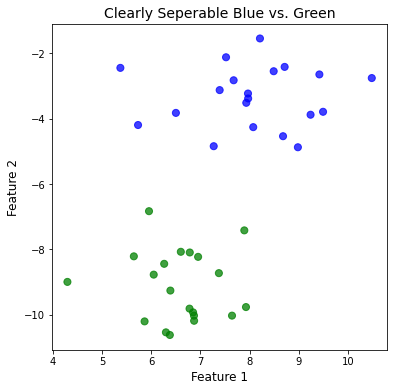

In [2]:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
bgs = ['b' if y[i] == 0 else 'g' for i in range(len(y))]
ax.scatter(X[:, 0], X[:, 1], c=bgs, s=50, alpha=0.75) 
ax.set_title('Clearly Seperable Blue vs. Green', fontsize=14)
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12) ;

Now create a linear SVM and fit it to our data

In [3]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

To see what has been done requires a bit more code - our efforts will be rewarded.

What you see is the hyperplane, line in 2D, that passed through the middle of the [no-man's-land](https://en.wikipedia.org/wiki/No_man%27s_land) between the two classes. This called the margin, and if you really want more see [Margin Classifier](https://en.wikipedia.org/wiki/Margin_classifier) 

In [4]:
def overlay_margin(ax, clf) :
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    return None
    

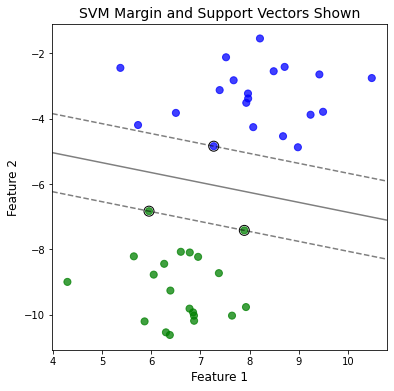

In [5]:
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
bgs = ['b' if y[i] == 0 else 'g' for i in range(len(y))]
ax.scatter(X[:, 0], X[:, 1], c=bgs, s=50, alpha=0.75) 
ax.set_title('SVM Margin and Support Vectors Shown', fontsize=14)
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)

overlay_margin(ax, clf)

plt.show()

# Gaussian Data Examples

Let us see how this looks for different 2D problems

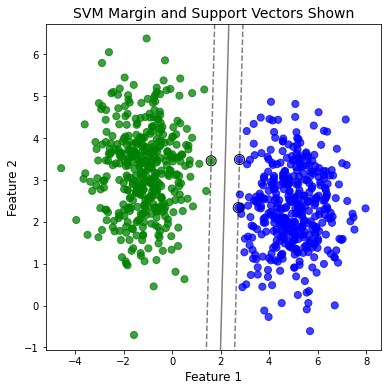

In [6]:
X, y = make_blobs(n_samples=800, centers=2)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
bgs = ['b' if y[i] == 0 else 'g' for i in range(len(y))]
ax.scatter(X[:, 0], X[:, 1], c=bgs, s=50, alpha=0.75) 
ax.set_title('SVM Margin and Support Vectors Shown', fontsize=14)
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)

overlay_margin(ax, clf)

plt.show()

# Recall Our Early Labeled Data Problem

In the first lecture on labeled data we used a 2D problem to intuitively motivate the notion of a linear boundary between two classes. Here is exactly that problem with the Linear SVM decision boundary shown

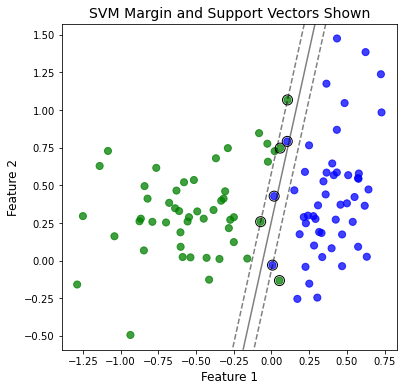

In [9]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, 
                          n_classes=2, n_clusters_per_class=1, 
                          class_sep=0.4, random_state=1)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
bgs = ['b' if y[i] == 0 else 'g' for i in range(len(y))]
ax.scatter(X[:, 0], X[:, 1], c=bgs, s=50, alpha=0.75) 
ax.set_title('SVM Margin and Support Vectors Shown', fontsize=14)
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)

overlay_margin(ax, clf)

plt.show()

# Conclusion

The Linear SVM is an extremely powerful idea and when you have data which is either linearly seperable or close to linearly seperable it is often the best tool in your tool box.  

There are myriad extensions that generalize the idea both to account for more than 2 classes and also for non-linear problems. We will come back to some of these. For the moment, you can do a lot worse than see the Perceptron and the SVM as bookends in time showing the development of understanding how to approach linear and nearly linear labeled data problems.